In [58]:
import numpy as np
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [59]:


def beta(stock,etf ):
    # Beta = covariance/variance   --- https://www.investopedia.com/terms/b/beta.asp ---
    cov_matrix = np.cov(stock, etf, ddof=0)
    var_stock = cov_matrix[0,0]
    cov_stock_etf = cov_matrix[0,1]
    return cov_stock_etf/var_stock



def sharpe_ratio(benchmark_returns, portfolio_returns):
    # ---      https://www.educba.com/sharpe-ratio-formula/    --- 
    # Sharpe Ratio = (expected rate of return of portfolio - risk free rate)/standard deviation of portfolio return
    # To be adjusted for interval used. Here, adjust by sqrt(252)
    portfolio_mean_return = portfolio_returns.mean()
    risk_free_rate = benchmark_returns.mean()
    volatility = portfolio_returns.std()
    return ((portfolio_mean_return - risk_free_rate)/volatility) * (252**0.5)

def drawdown(stock_close):
    rolling_max = stock_close.rolling(window=252,min_periods=1).max() # 52-week high
    rolling_min = stock_close.rolling(window=252, min_periods=1).min() # 52-week low
    return (rolling_min - rolling_max)/rolling_max # (52 week low - 52 week high)/52 week high



In [60]:
etfs = ['DIA','IWM','SPY']
stocks = ['AMD', 'BRK-B','DIS','LAC','META','TSM','UAL']
stock_cols = ['Ticker', 'Portfolio_Weight', 'Annualized_Volatility','Beta_Against_SPY','Beta_Against_IWM','Beta_Against_DIA',
'Avg_Weekly_Drawdown','Max_Weekly_Drawdown','Total_Return','Annualized_Total_Return']

n = len(stocks)
weight = 1/n
weights = [weight] * n

In [61]:
data = yf.download(stocks+etfs, period='10y')
data = data['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [74]:
st = data['AMD']
max_data = st.rolling(window=252, min_periods=1).max()
dd = st/max_data - 1
dd
# MDD = dd.rolling(window=252, min_periods=1).min()
# MDD.min()*100

Date
2013-02-28    0.000000
2013-03-01   -0.028112
2013-03-04   -0.036145
2013-03-05   -0.024096
2013-03-06   -0.024096
                ...   
2023-02-22   -0.378871
2023-02-23   -0.353413
2023-02-24   -0.366872
2023-02-27   -0.361359
2023-02-28   -0.352805
Name: AMD, Length: 2518, dtype: float64

In [75]:
rolling_max = st.rolling(window=252,min_periods=1).max() # 52-week high
rolling_min = st.rolling(window=252, min_periods=1).min() # 52-week low
dd1 = (rolling_min - rolling_max)/rolling_max # (52 week low - 52 week high)/52 week high
dd1
# MDD1 = dd1.rolling(window=252, min_periods=1).min()
# MDD1.min()*100

Date
2013-02-28    0.000000
2013-03-01   -0.028112
2013-03-04   -0.036145
2013-03-05   -0.036145
2013-03-06   -0.036145
                ...   
2023-02-22   -0.546457
2023-02-23   -0.546457
2023-02-24   -0.546457
2023-02-27   -0.546457
2023-02-28   -0.546457
Name: AMD, Length: 2518, dtype: float64

In [73]:
# REQUIREMENT 1: CONSTITUENT STOCK RISK ANALYSIS

# Create stocks dataframe
stocks_df = pd.DataFrame(columns=stock_cols)
stocks_df['Ticker'] = stocks
i = 0
for ticker in stocks:
    stock = data[ticker]
    stocks_df.at[i, 'Ticker'] = ticker
    stocks_df.at[i, 'Portfolio_Weight'] = weight 
    stocks_df.at[i, 'Annualized_Volatility'] = stock[-63:].std()*(252**0.5) 
    stocks_df.at[i, 'Beta_Against_SPY'] = beta(stock[-252: ], data['SPY'][-252: ])
    stocks_df.at[i, 'Beta_Against_IWM'] = beta(stock[-252: ], data['IWM'][-252: ])
    stocks_df.at[i, 'Beta_Against_DIA'] = beta(stock[-252: ], data['DIA'][-252: ])
    stocks_df.at[i, 'Avg_Weekly_Drawdown'] = drawdown(stock).mean()
    stocks_df.at[i, 'Max_Weekly_Drawdown'] = drawdown(stock).min()
    # --- RETURNS ---( www.corporatefinanceinstitute.com )
    # Absolute return = (final price - initial price)/initial price 
    # Annualized Total return = (((final value/initial value)^(1/n)) - 1) 
    stocks_df.at[i, 'Total_Return'] = (stock[-1] - stock[0])/stock[0] 
    stocks_df.at[i, 'Annualized_Total_Return'] = (((stock[-1]/stock[0])**(1/10))-1)
    i = i + 1

stocks_df

,Ticker,Portfolio_Weight,Annualized_Volatility,Beta_Against_SPY,Beta_Against_IWM,Beta_Against_DIA,Avg_Weekly_Drawdown,Max_Weekly_Drawdown,Total_Return,Annualized_Total_Return
0,AMD,0.142857,113.66635,1.078187,0.449982,0.315579,-0.547728,-0.865737,31.058232,0.414471
1,BRK-B,0.142857,77.156517,0.821296,0.362215,0.531671,-0.21543,-0.421031,1.989856,0.115745
2,DIS,0.142857,129.723654,1.264843,0.589738,0.404842,-0.299642,-0.575256,1.015219,0.072586
3,LAC,0.142857,35.136812,3.573044,1.712642,1.00213,-0.65866,-0.920209,27.011763,0.395514
4,META,0.142857,406.648842,0.443069,0.170209,0.080833,-0.398385,-0.744188,5.46477,0.205189
5,TSM,0.142857,120.58751,1.628129,0.704236,0.716468,-0.331534,-0.691835,5.484846,0.205563
6,UAL,0.142857,77.432961,1.873441,0.954226,1.885083,-0.417863,-0.790932,0.9459,0.068838


In [65]:
# REQUIREMENT 2: PORTFOLIO RISK VS ETFS

portfolio_vs_etf_cols = ['Ticker', 'Corr_against_ETF', 'Cov_against_ETF', 'Tracking_Errors', 'Sharpe_Ratio', 'Ann_Volatility_Spread']
portfolio_against_etf_df = pd.DataFrame(columns=portfolio_vs_etf_cols)
portfolio_against_etf_df['Ticker'] = etfs

In [66]:
portfolio = data[stocks]
portfolio_returns = portfolio.pct_change() 
portfolio_returns = portfolio_returns * weight # weighted portfolio returns
portfolio_returns = portfolio_returns.sum(axis=1) # year-on-year portfolio pct change


In [67]:
returns_all_df = pd.concat([data[etfs].pct_change(), data[stocks].pct_change(), portfolio_returns], axis=1) # df of all returns (etf, stocks, portfolio)
cols = etfs + stocks
cols.append('Portfolio')
returns_all_df.columns = cols
corr_matrix = returns_all_df.corr(method="pearson")
cov_matrix = returns_all_df.cov()

In [68]:
j = 0
for etf in etfs:
    portfolio_against_etf_df.at[j, 'Ticker'] = etf
    portfolio_against_etf_df.at[j, 'Corr_against_ETF'] = corr_matrix['Portfolio'][etf]
    portfolio_against_etf_df.at[j, 'Cov_against_ETF'] = cov_matrix['Portfolio'][etf]
    # --- https://www.investopedia.com/terms/t/trackingerror.asp ---
    # Tracking Error = std(portfolio_returns - benchmark returns)
    portfolio_against_etf_df.at[j, 'Tracking_Errors'] = (returns_all_df['Portfolio'] - returns_all_df[etf]).std()
    # Sharpe Ratio: using info from 1 years worth of data. Can't use already calculated returns
    portfolio_against_etf_df.at[j, 'Sharpe_Ratio'] = sharpe_ratio(returns_all_df[etf], returns_all_df['Portfolio']) 
    portfolio_against_etf_df.at[j, 'Ann_Volatility_Spread'] = ((returns_all_df['Portfolio'].std())*(252**0.5)) - ((returns_all_df[etf].std())*(252**0.5))
    j = j+1

portfolio_against_etf_df

,Ticker,Corr_against_ETF,Cov_against_ETF,Tracking_Errors,Sharpe_Ratio,Ann_Volatility_Spread
0,DIA,0.701861,0.000142,0.013312,0.663419,0.11947
1,IWM,0.737229,0.000187,0.01248,0.698552,0.075608
2,SPY,0.747036,0.000152,0.012597,0.63222,0.118741


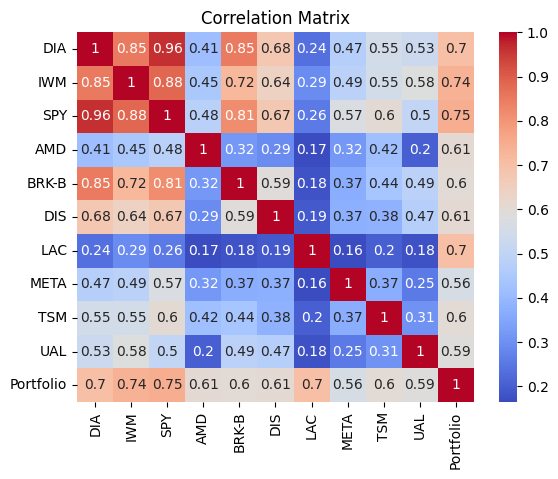

In [69]:
# REQUIREMENT NUMBER 3: CORRELATION MATRIX

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [70]:
stocks_df = stocks_df.style.set_caption('CONSTITUENT STOCK RISK ANALYSIS')
stocks_df

,Ticker,Portfolio_Weight,Annualized_Volatility,Beta_Against_SPY,Beta_Against_IWM,Beta_Against_DIA,Avg_Weekly_Drawdown,Max_Weekly_Drawdown,Total_Return,Annualized_Total_Return
0,AMD,0.142857,113.666350,1.078187,0.449982,0.315579,-0.547728,-86.573734,31.058232,0.414471
1,BRK-B,0.142857,77.156517,0.821296,0.362215,0.531671,-0.215430,-42.103100,1.989856,0.115745
2,DIS,0.142857,129.723654,1.264843,0.589738,0.404842,-0.299642,-57.525630,1.015219,0.072586
3,LAC,0.142857,35.136812,3.573044,1.712642,1.002130,-0.658660,-92.020879,27.011763,0.395514
4,META,0.142857,406.648842,0.443069,0.170209,0.080833,-0.398385,-74.418804,5.464770,0.205189
5,TSM,0.142857,120.587510,1.628129,0.704236,0.716468,-0.331534,-69.183541,5.484846,0.205563
6,UAL,0.142857,77.432961,1.873441,0.954226,1.885083,-0.417863,-79.093199,0.945900,0.068838


In [71]:
portfolio_against_etf_df = portfolio_against_etf_df.style.set_caption('PORTFOLIO RISK VS ETFS')
portfolio_against_etf_df

,Ticker,Corr_against_ETF,Cov_against_ETF,Tracking_Errors,Sharpe_Ratio,Ann_Volatility_Spread
0,DIA,0.701861,0.000142,0.013312,0.663419,0.119470
1,IWM,0.737229,0.000187,0.012480,0.698552,0.075608
2,SPY,0.747036,0.000152,0.012597,0.632220,0.118741
